<a href="https://colab.research.google.com/github/drbarak/NBA/blob/main/NBA2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# see https://stackoverflow.com/questions/52292456/installing-jupyter-contrib-nbextension-on-google-colab
#!pip install jupyter_contrib_nbextensions
#!jupyter contrib nbextension install --user
#!jupyter nbextension enable freeze/main

In [ ]:
# General tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display
p = print
d = display

In [ ]:
import sys
#sys.path.append("D:/Dropbox/DataScience")
#from my_utilities import my_utils as my

In [ ]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [ ]:
import pickle

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb+') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [ ]:
pd.set_option("precision", 2)
ncaa_dir = '/content/drive/MyDrive/NCAA/'

# Data

In [ ]:
year = 2021
#year = 2020
#year = 2019
#year = 2018
#year = 2017
#year = 2016

# changes of columns names from 2016-2017 to 2021
Team = 'TeamID'
Team_Name = 'TeamName'
Team_Id = 'TeamID'
Wteam = 'WTeamID'
Wscore = 'WScore'
Lteam = 'LTeamID'
Lscore = 'LScore'
Wloc = 'WLoc'
Numot = 'NumOT'
Wfgm3 = 'LFGM3'
Lfgm3 = 'WFGM3'
DayNum = 'DayNum'

NBA = True
if NBA:
  DayNum = 'Date'

GET_DATA = False

In [ ]:
def get_data(fname):
  try:
    teams_df = pd.read_csv(ncaa_dir + fname + '.csv')
  except:
    p(f'Error reading file {ncaa_dir}{fname}.csv')
    return None
  p(fname + '_df', teams_df.shape)
  d(teams_df.head())
  return teams_df

## 1. Teams

In [ ]:
teams_df = get_data('NBAteams')

NBAteams_df (30, 2)


,TeamID,TeamName
0,CLE,Cleveland Cavaliers
1,NYK,New York Knicks
2,CHI,Chicago Bulls
3,POR,Portland Trail Blazers
4,UTA,Utah Jazz


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
teams_df.head(30).sort_values(by='TeamName')

,TeamID,TeamName
8,ATL,Atlanta Hawks
7,BOS,Boston Celtics
15,BRK,Brooklyn Nets
17,CHO,Charlotte Hornets
2,CHI,Chicago Bulls
0,CLE,Cleveland Cavaliers
22,DAL,Dallas Mavericks
5,DEN,Denver Nuggets
21,DET,Detroit Pistons
25,GSW,Golden State Warriors


## 2. Seasons

DayZero: All game dates have been aligned upon a common scale so that (each year) the Monday championship game of the men's tournament is on DayNum=154.

RegionW, RegionX, Region Y, Region Z: Tournament proceeds with dividing US in 4 regions, but this division changes in year. These RegionW, X, Y, Z column represents 4 regions of each year. Note that RegionW & X, Y & Z have matchup in semifinals. Winner of WX and YZ regions have the final championship matchup.

In [ ]:
if not NBA:
  seasons_df = get_data('MSeasons')

## 3. Seeds

Seed column string consists of Region (W, X, Y, Z) + seed number (01 ~ 16). Seed number 01 is considered as most "strong". For play-in games, which occurs before main tournament, fourth character (a or b) is added.

Before tournament, 68 teams will be reduced to 64 teams, so 4 teams have pre-tournament match up. "a" and "b" is the match up of those teams.

In [ ]:
tourneySeeds_df = get_data('NBAseed')

NBAseed_df (180, 3)


,Season,Seed,TeamID
0,2016,E01,CLE
1,2016,E02,TOR
2,2016,E03,MIA
3,2016,E04,ATL
4,2016,E05,BOS


In [ ]:
d(tourneySeeds_df.tail())

,Season,Seed,TeamID
175,2021,W11,NOP
176,2021,W12,SAC
177,2021,W13,MIN
178,2021,W14,OKC
179,2021,W15,HOU


## 4. Regular Season Results

For each year, we have regular season at first

"Compact results" data stores important information for win/lose, while "Detailed results" data (explained later) stores much precise information. Let's see Compact results data here.

Store matchup date, winner/loser's team id & score.

Wteam: id of winning team
Lteam: id of loosing team
WScore: is the winner score at the end of game
LScore: is the loser score at the end of game
WLoc: the "location" of winning team, either ("H", "A", "N") - "H" is home, "A" is Away (visiting to opponent's site), "N" is neutral court.
NumOT: the number of overtime periods (when the score is same after 4-period of game, we continue the game with overtime period in basketball.)

The 4 columns, Season, DayNum, WTeamID and LTeamID uniquely identifies the game. This fact is very important when you want to merge information of other files.

In [ ]:
regularSeasonDetailedResults_df = get_data('NBAregular')

NBAregular_df (8274, 33)


,Season,Date,WTeamID,WScore,LTeamID,LScore,WLoc,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2015,2014-10-30,NYK,95,CLE,90,A,37,69,6,12,15,18,9,35,30,15,9,1,26,32,70,9,24,17,20,11,33,22,19,5,2,15
1,2015,2014-10-31,CLE,114,CHI,108,A,41,104,3,15,29,33,20,52,18,9,8,4,18,41,90,13,31,13,17,11,42,25,19,4,14,28
2,2015,2014-11-04,POR,101,CLE,82,H,37,75,8,25,19,25,9,48,21,11,7,4,20,31,85,9,21,11,14,13,41,18,14,5,3,19
3,2015,2014-11-05,UTA,102,CLE,100,H,39,77,7,21,17,22,13,41,26,12,3,8,26,30,72,6,16,34,40,7,30,6,12,8,4,22
4,2015,2014-11-07,CLE,110,DEN,101,A,40,84,6,23,24,33,6,42,25,8,5,3,14,40,85,11,29,10,15,8,42,22,13,5,5,22


In [ ]:
regularSeasonCompactResults_df = regularSeasonDetailedResults_df.iloc[:, 0:7]
p(regularSeasonCompactResults_df.shape)
regularSeasonCompactResults_df.head()

(8274, 7)


,Season,Date,WTeamID,WScore,LTeamID,LScore,WLoc
0,2015,2014-10-30,NYK,95,CLE,90,A
1,2015,2014-10-31,CLE,114,CHI,108,A
2,2015,2014-11-04,POR,101,CLE,82,H
3,2015,2014-11-05,UTA,102,CLE,100,H
4,2015,2014-11-07,CLE,110,DEN,101,A


### Detailed

This section provides game-by-game stats at a team level (free throws attempted, defensive rebounds, turnovers, etc.) for all regular season, conference tournament, and NCAA® tournament games since the 2002-03 season.

Team Box Scores are provided in "Detailed Results" files rather than "Compact Results" files.

Compact results are collected from 1985, but details results are collected since 2003, so the number of rows in the data are different.

But 8 columns (Season, DayNum, WTeamID, WScore, LTeamID, LScore, WLoc, and NumOT) are exactly same value with CompactResults file.

Additional columns stores more precise information:

WFGM - field goals made (by the winning team)
WFGA - field goals attempted (by the winning team)
WFGM3 - three pointers made (by the winning team)
WFGA3 - three pointers attempted (by the winning team)
WFTM - free throws made (by the winning team)
WFTA - free throws attempted (by the winning team)
WOR - offensive rebounds (pulled by the winning team)
WDR - defensive rebounds (pulled by the winning team)
WAst - assists (by the winning team)
WTO - turnovers committed (by the winning team)
WStl - steals (accomplished by the winning team)
WBlk - blocks (accomplished by the winning team)
WPF - personal fouls committed (by the winning team)

same set of stats from the perspective of the losing team starting with "L".

For example in top row WFGM=27, WFGM3=3, WFTM=11 and WScore=68.

This means (27-3)=24 goals with 2 points shot, 3 goals with 3 points shot, and 11 goals with 1 point free throw shot.
In total 24 * 2 + 3 * 3 + 11 * 1 = 68.

In [ ]:
regularSeasonDetailedResults_df = get_data('NBAregular')

NBAregular_df (8274, 33)


,Season,Date,WTeamID,WScore,LTeamID,LScore,WLoc,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2015,2014-10-30,NYK,95,CLE,90,A,37,69,6,12,15,18,9,35,30,15,9,1,26,32,70,9,24,17,20,11,33,22,19,5,2,15
1,2015,2014-10-31,CLE,114,CHI,108,A,41,104,3,15,29,33,20,52,18,9,8,4,18,41,90,13,31,13,17,11,42,25,19,4,14,28
2,2015,2014-11-04,POR,101,CLE,82,H,37,75,8,25,19,25,9,48,21,11,7,4,20,31,85,9,21,11,14,13,41,18,14,5,3,19
3,2015,2014-11-05,UTA,102,CLE,100,H,39,77,7,21,17,22,13,41,26,12,3,8,26,30,72,6,16,34,40,7,30,6,12,8,4,22
4,2015,2014-11-07,CLE,110,DEN,101,A,40,84,6,23,24,33,6,42,25,8,5,3,14,40,85,11,29,10,15,8,42,22,13,5,5,22


## 5. Tournament Results

Same format as regular season file
For tournament all games are neutral site (so WLoc is always N).

In [ ]:
tourneyDetailedResults_df = get_data('NBAplayoff')
tourneyCompactResults_df = tourneyDetailedResults_df.iloc[:, 0:7]
p(tourneyCompactResults_df.shape)
tourneyCompactResults_df

NBAplayoff_df (493, 33)


,Season,Date,WTeamID,WScore,LTeamID,LScore,WLoc,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2015,2015-04-19,CLE,113,BOS,100,H,37,82,13,31,26,33,15,46,19,12,6,5,23,37,79,8,22,18,22,7,34,24,14,7,4,29
1,2015,2015-04-21,CLE,99,BOS,91,H,34,76,7,29,24,26,12,47,18,18,7,10,22,33,85,6,22,19,22,13,39,19,11,6,3,22
2,2015,2015-04-23,CLE,103,BOS,95,A,38,84,12,29,15,24,11,45,17,11,9,7,18,36,82,5,19,18,21,9,45,20,15,6,5,23
3,2015,2015-04-26,CLE,101,BOS,93,A,31,78,7,33,32,43,10,50,13,8,9,9,30,33,85,3,23,24,37,11,45,17,14,2,3,33
4,2015,2015-05-04,CHI,99,CLE,92,A,40,80,10,18,9,16,11,42,23,10,7,6,15,34,81,7,26,17,19,11,39,17,9,6,6,16


(493, 7)


,Season,Date,WTeamID,WScore,LTeamID,LScore,WLoc
0,2015,2015-04-19,CLE,113,BOS,100,H
1,2015,2015-04-21,CLE,99,BOS,91,H
2,2015,2015-04-23,CLE,103,BOS,95,A
3,2015,2015-04-26,CLE,101,BOS,93,A
4,2015,2015-05-04,CHI,99,CLE,92,A
...,...,...,...,...,...,...,...
488,2019,2019-04-15,LAC,135,GSW,131,A
489,2019,2019-04-18,GSW,132,LAC,105,A
490,2019,2019-04-21,GSW,113,LAC,105,A
491,2019,2019-04-24,LAC,129,GSW,121,A


In [ ]:
tourneyDetailedResults_df = get_data('NBAplayoff')

NBAplayoff_df (493, 33)


,Season,Date,WTeamID,WScore,LTeamID,LScore,WLoc,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2015,2015-04-19,CLE,113,BOS,100,H,37,82,13,31,26,33,15,46,19,12,6,5,23,37,79,8,22,18,22,7,34,24,14,7,4,29
1,2015,2015-04-21,CLE,99,BOS,91,H,34,76,7,29,24,26,12,47,18,18,7,10,22,33,85,6,22,19,22,13,39,19,11,6,3,22
2,2015,2015-04-23,CLE,103,BOS,95,A,38,84,12,29,15,24,11,45,17,11,9,7,18,36,82,5,19,18,21,9,45,20,15,6,5,23
3,2015,2015-04-26,CLE,101,BOS,93,A,31,78,7,33,32,43,10,50,13,8,9,9,30,33,85,3,23,24,37,11,45,17,14,2,3,33
4,2015,2015-05-04,CHI,99,CLE,92,A,40,80,10,18,9,16,11,42,23,10,7,6,15,34,81,7,26,17,19,11,39,17,9,6,6,16


In [ ]:
tourneyCurrentResults_df = get_data(f'NBAplayoff{year}')

NBAplayoff2021_df (32, 20)


,0,1,WTeamID,LTeamID,Wodds,Lodds,Wsprd,Lsprd,Pred,Winner,Note,Actual,Correct,GameDate,Today,Season,Odds,Sprd,ActSprd,ToToCorrect
0,0.77,0.23,CHI,BRK,0.0,0.0,0.0,0.0,0,BRK,NaN,0,True,2021-05-16 03:00,2021-05-17 18:00,2021,0.0,0.0,0.0,False
1,0.36,0.64,LAL,IND,0.0,0.0,0.0,0.0,1,LAL,NaN,1,True,2021-05-16 03:00,2021-05-17 18:00,2021,0.0,0.0,0.0,False
2,0.62,0.38,CHO,NYK,0.0,0.0,0.0,0.0,0,NYK,NaN,0,True,2021-05-16 03:00,2021-05-17 18:00,2021,0.0,0.0,0.0,False
3,0.35,0.65,BOS,MIN,0.0,0.0,0.0,0.0,1,BOS,NaN,1,True,2021-05-16 03:00,2021-05-17 18:00,2021,0.0,0.0,0.0,False
4,0.26,0.74,PHO,SAS,0.0,0.0,0.0,0.0,1,PHO,NaN,1,True,2021-05-16 03:00,2021-05-17 18:00,2021,0.0,0.0,0.0,False


# Prepare season data

In [ ]:
def get_seed(year, team):
  ## prev year turney
  mask = (tourneySeeds_df.Season == year - 1) & (tourneySeeds_df[Team] == team)
  df_seed = tourneySeeds_df[mask]
  seed = 0 if len(df_seed) == 0 else int(df_seed.Seed.str[1:3])
  return seed

In [ ]:
def get_stat(team, year, df, win_type):
  Wteam_, Lteam_ = (Wteam, Lteam) if win_type == 'W' else (Lteam, Wteam)
    # data for each game in a given year
  df_year = df[df.Season == year]
  df_year_prev = df[df.Season == year - 1]
#  p(len(df_year), len(df_year_prev))
  # data for the team in that year
  if len(df_year) == 0 and len(df_year_prev) == 0:
    return None, None
  if len(df_year) > 0:
    df_team = df_year[(df_year[Wteam_] == team) | (df_year[Lteam_] == team)]
  else:
    df_team = pd.DataFrame()
  df_team_prev = df_year_prev[(df_year_prev[Wteam_] == team) | (df_year_prev[Lteam_] == team)]
  if len(df_team) == 0 and len(df_team_prev) == 0:
    return None, None

  # data for games won/lost in that year
  if len(df_year) > 0:
    df_games_won = df_team[df_team[Wteam_] == team]
    numWins = len(df_games_won)
  else:
    numWins = 0
  df_games_won_prev = df_team_prev[df_team_prev[Wteam_] == team]
  numWins_prev = len(df_games_won_prev)
  if numWins == 0 and numWins_prev == 0:
    return None, None

  if win_type == 'W':
    wins = {'Wins': numWins, 'Wins_prev': numWins_prev, 'WSeed': 0}
  else:
    wins = {'Losses': numWins, 'Losses_prev': numWins_prev, 'LSeed': 0}

  for col in ['WScore', 'Wallow', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR',
         'WAst', 'WTO', 'WStl', 'WBlk', 'WPF']:#, DayNum]:
    col__ = win_type + col[1:]
    if win_type == 'W':
      col_ = col__ if col__ != 'Wallow' else 'LScore'
    else:
      col_ = col__ if col__ != 'Lallow' else 'WScore'
    colTot = df_games_won[col_].sum() if len(df_year) > 0 else 0
    colTot += df_games_won_prev[col_].sum()
    wins[col__] = (colTot, colTot / (numWins + numWins_prev)) if (numWins + numWins_prev) > 0 else (0, 1)
    
  if len(df_year) > 0:
    for idx, row in df_games_won.iterrows():
      wins[win_type + 'Seed'] += get_seed(year, row[Lteam_])
  for idx, row in df_games_won_prev.iterrows():
    wins[win_type + 'Seed'] += get_seed(year, row[Lteam_])
#  p(wins)
  return wins, numWins

In [ ]:
SEED_FACTOR=10 # so that 0 has much lower ranking than teams that were in the torney
def getSeasonData(team, year):
#  p(year, team)
  prefix = ''
  games_df_ = pd.DataFrame()
  for df_ in [regularSeasonDetailedResults_df]:#, tourneyDetailedResults_df]: # precision went down from 63 to 62 when we added the tourney data like that (year 2017)
    wins, numWins = get_stat(team, year, df_, 'W')
    losses, numLosses = get_stat(team, year, df_, 'L')
    if wins is None: numWins= 0
    if losses is None: numLosses = 0
    numGames = numWins + numLosses
    games = {'Games': numGames, 'GSeed': 0}
    for col in ['LScore', 'Lallow', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3',
          'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF']:
      col_ = col[1:]
      colTot = (wins['W' + col_][0] if wins is not None else 0) + \
                (losses[col][0] if losses is not None else 0)
      colAvg = colTot / numGames if numGames > 0 else 0
      games[prefix + 'G' + col_] = (colTot, colAvg)
    if wins is not None:      
      games[prefix + 'GSeedW'] = wins['WSeed']
      colTot = wins['WScore'][0] - wins['Wallow'][0]
      colAvg = colTot / numWins if numWins > 0 else 0
      games[prefix + 'GSprdW'] = (colTot, colAvg)
    else:
      games[prefix + 'GSeedW'] = games[prefix + 'GSprdW'] = (0, 0)
    if losses is not None:
      games[prefix + 'GSeedL'] = -losses['LSeed']
      colTot = losses['LScore'][0] - losses['Lallow'][0]
      colAvg = colTot / numLosses if numLosses > 0 else 0
      games[prefix + 'GSprdL'] = (colTot, colAvg)
    else:
      games[prefix + 'GSeedL'] = games[prefix + 'GSprdL'] = (0,0)
    games_df = pd.DataFrame(games) # for each row it creates 2 rows: one for the colTot and one for colAvg
      # when we dropped the row with totals or the row with avrages - same results
      # when we did niot drop any, there was an improvement of 1% (64->65) for RF but overfitting (Train=71, test=65) and no change in LR (with max_iter=3000)
    games_df.drop(0, axis=0, inplace=True) # this is the row with totals - leaves only avrages

    games_df[prefix + 'Games'] = numWins  # so when cal diff we don't get 0 (simce all teams play the same number of games)

    seed = get_seed(year, team)
    seed = 0 if seed == 0 else seed + SEED_FACTOR # so that 0 has much lower ranking than teams that were in the tourney
    games_df[prefix + 'GSeed'] = seed
    games_df_ = pd.concat([games_df_, games_df], axis="columns")
    prefix = 't_'
  df = tourneyDetailedResults_df
  lastTourney = 1 if len(df[(df.Season==year) & ((df[Wteam] == team) | (df[Lteam] == team))]) > 0 else 0
  games_df_['lastTourney'] = lastTourney
  games_df_['lastTourneyWins'] = len(df[(df.Season==year) & (df[Wteam] == team)])
  games_df_['prevTourneyWins'] = len(df[(df.Season < year) & (df[Wteam] == team)])
  games_df_['lastTourneyLosses'] = -len(df[(df.Season==year) & (df[Lteam] == team)])
  games_df_['prevTourneyLosses'] = -len(df[(df.Season < year) & (df[Lteam] == team)])

  if lastTourney == 0: # team is not in playoff (either no data yet or did not reach playoff)
    try: # in case this dataset does not exists yet
      df = tourneyCurrentResults_df
    except:
      return games_df_
    if len(df) > 0:
      games_df_['lastTourney'] = 1 if len(df[(df.Season==year) & ((df[Wteam] == team) | (df[Lteam] == team))]) > 0 else 0
      games_df_['lastTourneyWins'] = len(df[(df.Season==year) & \
                (((df[Wteam] == team) & (df.Actual == 1)) | ((df[Lteam] == team) & (df.Actual == 0)))])
      games_df_['lastTourneyLosses'] = -len(df[(df.Season==year) & \
                      (((df[Wteam] == team) & (df.Actual == 0)) | ((df[Lteam] == team) & (df.Actual == 1)))])
  return games_df_

# Prepare X

> We use the list of all the the games in the regular season and the tourney of the year before

> for each game, we calc the diff between the 2 vectors and add the Home feature (using the Wloc column) and the y (win or loss)

> We also create Loss records (mirror image of the win record) - to have balanced dataset which on average will give 50% chance to each team

In [ ]:
regularSeasonCompactResults_df[(regularSeasonCompactResults_df.Season == year)]

,Season,Date,WTeamID,WScore,LTeamID,LScore,WLoc
7209,2021,2020-12-23,CLE,121,CHO,114,H
7210,2021,2020-12-26,CLE,128,DET,119,A
7211,2021,2020-12-27,CLE,118,PHI,94,H
7212,2021,2020-12-29,NYK,95,CLE,86,A
7213,2021,2020-12-31,IND,119,CLE,99,H
...,...,...,...,...,...,...,...
8269,2021,2021-01-03,CHI,118,DAL,108,H
8270,2021,2021-01-17,CHI,117,DAL,101,A
8271,2021,2021-02-08,WAS,105,CHI,101,A
8272,2021,2021-04-03,DAL,109,WAS,87,A


In [ ]:
def get_teamID(teamW):
  return teams_df[teams_df.TeamID == teamW].index[0]

In [ ]:
try:
  del teams_vectors
except:
  pass
teams_vectors={}

def get_season(year):
  return regularSeasonCompactResults_df[(regularSeasonCompactResults_df.Season == year)]

def create_X(year):
  season = get_season(year)
  tourney = tourneyCompactResults_df[tourneyCompactResults_df.Season == year - 1]

  X = pd.DataFrame()
  count = 0
  
  for arr in [season, tourney]:
    for index, row in arr.iterrows():
      teamW = row[Wteam]
      teamL = row[Lteam] 

      if not teamW in teams_vectors:
        teams_vectors[teamW] = getSeasonData(teamW, year)
      dfw = teams_vectors[teamW]

      if not teamL in teams_vectors:
        teams_vectors[teamL] = getSeasonData(teamL, year)
      dfl = teams_vectors[teamL]

      diff = dfw - dfl
      diff[Wteam] = get_teamID(teamW)
      diff[Lteam] = get_teamID(teamL)
      diff['Wloc'] = 1 if row[Wloc] == 'H' else 0 if row[Wloc] == 'N' else -1
      if True or not index % 2:
        diff['Win'] = 1
        X = X.append(diff)
      
      if True or index % 2:
        diff = -diff
        diff['Win'] = 0
        diff[Wteam] = -diff[Wteam]
        diff[Lteam] = -diff[Lteam]
        X = X.append(diff)
      count += 1
    
#  X.head()
#  X.to_csv('NCAA2019.csv', index = False)
#  save_obj(teams_vectors, 'teams_vectors')
  return X

In [ ]:
try:
  del teams_vectors
except:
  pass
teams_vectors={}

if not GET_DATA:
  p(year)
  p(len(teams_vectors))

  X_full = create_X(year)
  X_full.drop_duplicates(inplace=True)
      
  p(len(teams_vectors))    
  p(X_full.shape)
  p(X_full.columns)

2021
0
30
(1940, 30)
Index(['Games', 'GSeed', 'GScore', 'Gallow', 'GFGM', 'GFGA', 'GFGM3', 'GFGA3',
       'GFTM', 'GFTA', 'GOR', 'GDR', 'GAst', 'GTO', 'GStl', 'GBlk', 'GPF',
       'GSeedW', 'GSprdW', 'GSeedL', 'GSprdL', 'lastTourney',
       'lastTourneyWins', 'prevTourneyWins', 'lastTourneyLosses',
       'prevTourneyLosses', 'WTeamID', 'LTeamID', 'Wloc', 'Win'],
      dtype='object')


# Models

In [ ]:
SPREAD = True
if SPREAD:
  import sys
  sys.path.append('/content/drive/MyDrive')

  try:
    import dataframe_image as dfi
  except:
    !pip install dataframe_image
    import dataframe_image as dfi

  import ML_Run_Models as ml 

     |████████████████████████████████| 1.3MB 14.4MB/s 
     |████████████████████████████████| 143kB 43.7MB/s 
     |████████████████████████████████| 296kB 40.6MB/s 


In [ ]:
from sklearn.model_selection import train_test_split
if not GET_DATA:

  if SPREAD:
    X = X_full.drop(['GSprdW', 'Win'], axis=1)
    Z = X_full[['GSprdW', 'Win']]
    y = X_full.GSprdW
  else:
    X = X_full.drop('Win', axis=1)
    y = X_full.Win.astype(int)

  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)


## Models - process_model code

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import math

pd.set_option("precision", 2)
df_result = pd.DataFrame()

In [ ]:
def report(clf, X, y, note, test, data_type='Test'):
  global df_result
  name = type(clf).__name__ + ': ' + data_type
  acc = accuracy_score(y_true=y, y_pred=clf.predict(X))
  index = [(name, clf.classes_[0]), (name, clf.classes_[1])]
  cm = pd.DataFrame(confusion_matrix(y_true=y, y_pred=clf.predict(X)),
                    index=clf.classes_,
                    columns=clf.classes_)
  cm.reset_index(drop=True, inplace=True)
  rep = classification_report(y_true=y, y_pred=clf.predict(X), zero_division=1, output_dict=True)
  rep =  pd.DataFrame(rep)
  rep = rep.T
  rep['accuracy'] = acc
  rep.support = rep.support.astype(int)
  cols = list(rep.columns[:3]) + ['accuracy', 'support']
  rep = rep[cols]
  rep['precision_avg'] = rep.precision['macro avg']
  rep['recall_avg'] = rep.recall['macro avg']
  rep['f1-score_avg'] = rep['f1-score']['macro avg']
  rep.drop(['accuracy', 'macro avg', 'weighted avg'], axis=0, inplace=True)
  rep.reset_index(drop=True, inplace=True)
  df = cm.join(rep)
  df['name'] = name
  df['note'] = note
  df.loc[1, 'note'] = ''
  if test:  # do not add to database
    d(df)
  else:    
    df.reset_index(inplace=True)
    df_result.reset_index(inplace=True)
    df_result = df_result.append(df, ignore_index=True)
    df_result.set_index(['name', 'index'], inplace=True)
  return df_result

In [ ]:
#ROC and AUC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def get_roc_and_auc(model,X_test,y_test):
    ns_probs = [0 for _ in range(len(y_test))]
#    lr_probs = clf_voting.predict_proba(X_test)[:,1]
    lr_probs = model.predict_proba(X_test)[:,1]
    ns_auc = roc_auc_score(y_test, ns_probs)
    lr_auc = roc_auc_score(y_test, lr_probs)
    # summarize scores
    print('\nNo Skill: ROC AUC=%.3f' % (ns_auc))
    print('model: ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
    # plot the roc curve for the model
    fig = plt.figure(figsize=(5,5))
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='model')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(type(model).__name__ )
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

In [ ]:
def showFeatureImportance(model, X, threshold):
  if type(model).__name__ == 'LogisticRegression':  # no features importance data
    w0 = model.intercept_[0]
    w = model.coef_[0]
    fx_imp = pd.Series(w, index=X.columns)
  else:
    fx_imp = pd.Series(model.feature_importances_, index=X.columns)
  fx_imp /= fx_imp.sum()
  fx_imp = fx_imp.sort_values()
  fx_imp = fx_imp[fx_imp > threshold]
  fig = plt.figure(figsize=(5,5))
  plt.xlim(0, 1)
  fx_imp.plot(kind='barh', title=type(model).__name__ )

In [ ]:
def process_model(model, X, y, X_test, y_test, plot=False, threshold=0, note='', test=False):
  p('running: ', type(model).__name__, X.shape)
  model.fit(X, y)
  report(model, X, y, note, test, 'Train')
  report(model, X_test, y_test, note, test)
  if plot:
    showFeatureImportance(model, X, threshold)
    get_roc_and_auc(model,X_test,y_test)    
  return df_result 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingRegressor, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
try:
  import catboost as ctb
except:
  !pip install catboost
  !pip install xgboost
  !pip install lightgbm
import catboost as ctb  
import xgboost as xgb  
import lightgbm as lgb

     |████████████████████████████████| 67.3MB 54kB/s 



## Models

,train_rmse,train_rmsle,train_rms%,test_rmse,test_rmsle,test_rms%,valid_rmse%,valid_rmsle%
model,,,,,,,,
RandomForestRegressor,1.62,0.23,25.85,2.77,0.43,53.6,70.61,86.69


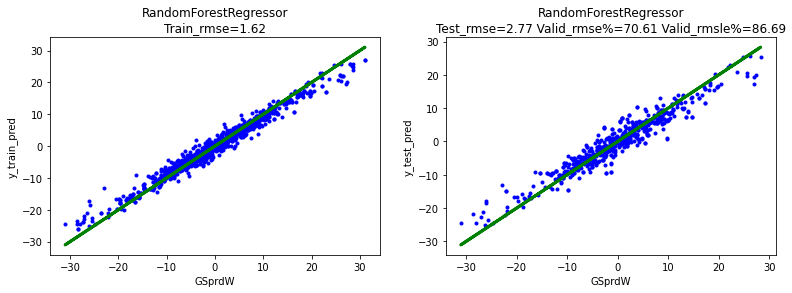

LinearRegression
DecisionTreeRegressor
KNeighborsRegressor
RandomForestRegressor


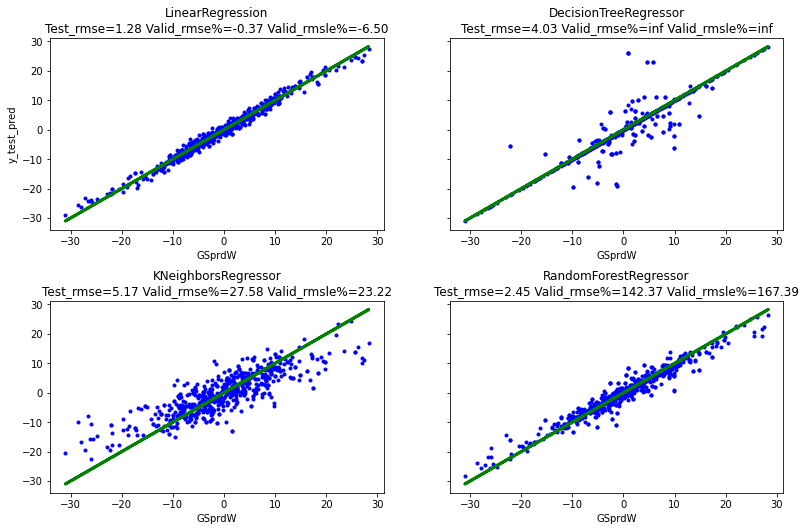

,train_rmse,train_rmsle,train_rms%,test_rmse,test_rmsle,test_rms%,valid_rmse%,valid_rmsle%
model,,,,,,,,
LinearRegression,1.28,0.22,24.22,1.28,0.20,22.48,-0.37,-6.50
DecisionTreeRegressor,0.00,0.00,0.00,4.03,0.50,64.90,inf,inf
KNeighborsRegressor,4.05,0.55,73.47,5.17,0.68,97.15,27.58,23.22
RandomForestRegressor,1.01,0.15,15.93,2.45,0.40,48.46,142.37,167.39


""


NBA_result_2021.csv


In [ ]:
df_result = pd.DataFrame()

if SPREAD:
  ML_ = ml.run_model(X_full, col='GSprdW', ratio_col=None, is_log_scale=False, plot=True, disp=True, model_num=ml.randomForestRegressor,
                  random_state=73, min_samples_split=11, max_features=19, n_estimators=200)    
  ML_ = ml.run_models(X_full, col='GSprdW', ratio_col=None, is_log_scale=False, plot=True, disp=True)#, random_state=73)  
  clf_LR = None  
else:
  clf_LR = LogisticRegression(C=10, fit_intercept=False, max_iter=1000, warm_start=True, random_state=73)
  process_model(clf_LR, X_train, y_train, X_test, y_test, threshold=0.01, plot=False, note="C=10, fit_intercept=False, max_iter=1000, warm_start=True, random_state=73")

  clf_RF = RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=None, min_samples_split=20, ccp_alpha=0.006, random_state=73)
  process_model(clf_RF, X_train, y_train, X_test, y_test, plot=False, threshold=0.015, note="n_estimators=200, criterion='entropy', max_depth=None, min_samples_split=20, ccp_alpha=0.0003, random_state=73")

clf_AB = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5), n_estimators=100, learning_rate=0.01)
#process_model(clf_AB, X_train, y_train, X_test, y_test)

#process_model(KNeighborsClassifier(n_neighbors=39), X_train, y_train, X_test, y_test)

clf_GB = GradientBoostingClassifier(ccp_alpha=0.0001, n_estimators=100, random_state=73)
#process_model(clf_GB, X_train, y_train, X_test, y_test, threshold=0.01, plot=False, note='ccp_alpha=0.0001, n_estimators=100, random_state=73')

model_CBC = ctb.CatBoostClassifier(logging_level='Silent', random_state=73, od_pval=0.1)#depth=None, iterations=None, learning_rate=0.1, l2_leaf_reg=5) #10, od_pval
#process_model(model_CBC, X_train, y_train, X_test, y_test, plot=False, threshold=0.012, note="random_state=73, od_pval=0.1")#, iterations=None depth=None, learning_rate=0.1, l2_leaf_reg=5")

model = xgb.XGBClassifier(random_state=73)
#process_model(model, X_train, y_train, X_test, y_test, plot=False, threshold=0.012)

model = lgb.LGBMClassifier(silent=False, random_state=73)#, max_depth=None, n_estimators=100, learning_rate=0.05)
#process_model(model, X_train, y_train, X_test, y_test, plot=False, threshold=0.012, note="random_state=73")#, n_estimators=100 max_depth=None, random_state=73, learning_rate=0.05")

d(df_result)

prefix = 'NBA' if NBA else 'NCCA'
id=year
fname = f'{prefix}_result_{id}.csv'
df_result.to_csv(fname, index=True)
p(fname)

# **QUESTIONS**

1. Entropy of the dataset

2. How to improve model - get 64% precision at most

# Entropy

In [ ]:
def entropy(s, verbose=0):
  p(s)
  _, classes_count = np.unique(s, return_counts=True)
  p(classes_count)
  percentages = classes_count / len(s)
  p(percentages)
  
  entropy = 0
  for pct in percentages:
    if pct > 0:
      entropy += pct * np.log2(pct)
  entropy = -entropy
  if verbose == 2: p('Entropy', np.round(entropy, 5))
      
  return entropy

s = [0,0,0,0,0,0,0,1,1,1]
np.round(entropy(s), 5)

[0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
[7 3]
[0.7 0.3]


0.88129

In [ ]:
np.round(entropy(y), 5)

1     3.64
1    -3.64
1    -8.62
1     8.62
1    -5.46
     ...  
1    -4.94
1     2.63
1    -2.63
1    17.95
1   -17.95
Name: GSprdW, Length: 1940, dtype: float64
[2 2 1 2 2 2 3 2 2 2 2 3 2 2 2 3 2 2 2 2 2 3 2 3 2 2 2 2 3 3 2 3 2 4 2 3 2
 2 3 3 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 3 2 2 2 2 3 2 2 2 2 2 2 2 3 2 3 2 2 4
 2 2 2 3 2 2 2 2 2 2 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 3 2 2 2 2 2
 2 2 3 2 2 2 2 2 2 2 2 2 2 3 2 2 3 2 2 3 2 2 2 3 3 3 2 3 2 2 2 2 2 2 2 3 2
 3 2 2 3 4 2 2 2 4 2 2 2 2 3 2 2 2 2 2 2 2 3 2 3 3 2 2 2 3 2 2 2 2 3 2 2 2
 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 3 2 2 2 2 2 2 3 3 4 3 3
 2 2 3 2 2 3 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 4 3 2 3 2 2 2 2 2 2 2 2 2 2 2 2
 2 3 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 2 2 2 3
 2 3 3 3 3 3 2 2 2 4 2 2 2 2 2 2 3 2 2 2 2 3 2 2 2 3 4 2 3 2 3 3 3 2 3 2 2
 2 2 2 3 3 2 2 2 2 2 3 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2
 2 3 2 2 1 2 2 3 2 2 2 2 3 2 2 3 2 2 2 2 2 2 3 3 2 3 2 2 2 3 3 2 2 2 3 2 2
 2 2 2 2 2 

9.73404

# Predict a game

In [ ]:
def predictGame(team1, team2, home=0):
  diff = teams_vectors[team1] - teams_vectors[team2]
  diff['Wloc'] = home
  #d(diff)
  model = clf_LR
  p(model.predict(diff)[0])
  p(model.predict_proba(diff))

In [ ]:
if not GET_DATA:

  if NBA:
    team1, team2 = 'CLE', 'CHI'
  else:
    team1 = teams_df[teams_df[Team_Name].str.find('North') >= 0][Team_Id].values[0]
    team2 = teams_df[teams_df[Team_Name].str.find('Villanova') >= 0][Team_Id].values[0]
    team1, team2
  diff = teams_vectors[team1] - teams_vectors[team2]
  diff['Wloc'] = 0

  if SPREAD:
    model_lm = ml.models_lookup[0]()
    df_ = ml.model_fit_score(model_lm, X_train, y_train, X_test, y_test, is_log_scale=False, ratio_col=None)
    ml.ML.update(model_lm, X_train, X_test, y_train, y_test, X, y, df_, is_log_scale=False)
    diff[Wteam] = get_teamID(team1)
    diff[Lteam] = get_teamID(team2)
    diff_X = diff.drop(['GSprdW'], axis=1)
    diff_y = diff.GSprdW
    p(model_lm.predict(diff_X))
  else:
    model = clf_LR
    model.fit(X_train, y_train)
    p(model.predict(diff)[0])
    p(model.predict_proba(diff))

[-1.21146711]


# Predict the results of the season

In [ ]:
def predict_table(source, both=True, model=clf_LR):
  result_df = pd.DataFrame()
  for index, row in source.iterrows():
    teamW = row[Wteam]
    teamL = row[Lteam] 

    diff = teams_vectors[teamW] - teams_vectors[teamL]
    diff['Wloc'] = 1 if row[Wloc] == 'H' else 0 if row[Wloc] == 'N' else -1
    if SPREAD:
      diff[Wteam] = get_teamID(teamW)
      diff[Lteam] = get_teamID(teamL)
      diff_X = diff.drop(['GSprdW'], axis=1)
      diff_y = diff.GSprdW
      y_pred = model.predict(diff_X)
      result = pd.DataFrame([y_pred], columns=['PredSprd'])
      if 'WScore' in source.columns:
        result['ActSprd'] = row.WScore - row.LScore
      else:
        result['ActSprd'] = row.ActSprd
      result['Pred'] = 1 if y_pred > 0 else 0
      result['PredWin'] = teamW if y_pred > 0 else teamL
      result['Actual'] = 1 if 'Win' not in source.columns else row.Win
      result['Correct'] = (result.Actual == result.Pred)
      result['CorSprd'] = (result.Actual == result.Pred) & ( 
                  ((result.ActSprd > result.PredSprd) &  (result.Pred == 1)) | 
                  ((result.ActSprd < result.PredSprd) & (result.Pred == 0))  )
    else:
      result = pd.DataFrame(model.predict_proba(diff))
      y_pred = 1 if result.iloc[0,1] > 0.5 else 0
      result['Pred'] = y_pred
      result['PredWin'] = teamW if y_pred == 1 else teamL
      result['Note'] = '***' if abs(result.iloc[0,1] - result.iloc[0,0]) < 0.041 else ''
      result['Actual'] = 1 if 'Win' not in source.columns else row.Win
      result['Correct'] = (result.Actual == result.Pred)

    result['WTeamID'] = teamW
    result['LTeamID'] = teamL
    if 'Wodds' in row:
      result['Wodds'],result['Lodds'],result['Wsprd'],result['Lsprd'] = row['Wodds'],row['Lodds'],row['Wsprd'],row['Lsprd']
#      result['Lodds'] = row['Lodds']
    result_df = result_df.append(result, ignore_index=True)
    if not both:
      continue
    diff = -diff
    result = pd.DataFrame(model.predict_proba(diff))
    result['Teams'] = f'{teamL}_{teamW}'
    result_df = result_df.append(result)
  return result_df

In [ ]:
result_df = predict_table(get_season(year))

In [ ]:
result_df.shape

In [ ]:
pd.set_option("precision", 5)
p(result_df.mean())
pd.set_option("precision", 2)

# Results of tourney for year



In [ ]:
year

**NOTE:**  no playoff yet for 2021 (on 05/2021)

In [ ]:
if not GET_DATA:
  tourney_year = tourneyCompactResults_df[tourneyCompactResults_df.Season == year]
  if len(tourney_year):
    d(tourney_year.head(20))
    if SPREAD:
      tourney_result_df = predict_table(tourney_year, both=False, model=model_lm)
    else:
      tourney_result_df = predict_table(tourney_year, False)
    d(tourney_result_df.head(20))
    p(tourney_result_df.Correct.sum() / len(tourney_result_df))
    p(tourney_result_df.Correct.sum(), len(tourney_result_df))

## Predict results of playoff 2021 - created on 16.05.2021 for games 15/05/2021 (check and it was 100%) and for 16.05.2021 - we will know tommorow

Odds are -110 which means for each game we predicted correct and we bet $100, we get $90.09 profit + our $100, and for each game we were wrong we loose $100. Which means if we r correct on 6 out of the 15 we already making money because we make 6*190.1 - 900 = 140.6

In [101]:
# the last columns ('Win') 0=the first team(Wteam) loses 1=Wteam wins
# spread - if it is +2 means that you add 2 pts to your team score and then check the result (if it lost by 1 pts then +2 will make it a winner for the bet)
playoff_future = [['2021-05-16 03:00','CHI','BRK',0,'A',0,0,0,0,-14],
                  ['2021-05-16 03:00','LAL','IND',1,'A',0,0,0,0,7],
                  ['2021-05-16 03:00','CHO','NYK',0,'A',0,0,0,0,-9],
                  ['2021-05-16 03:00','BOS','MIN',1,'A',0,0,0,0,16],
                  ['2021-05-16 03:00','PHO','SAS',1,'A',0,0,0,0,37],
                  ['2021-05-16 03:00','MIA','MIL',0,'A',0,0,0,0,-14],

                  ['2021-05-17 03:00','BOS','NYK',0,'A',0,0,0,0,-4],
                  ['2021-05-17 03:00','IND','TOR',1,'N',0,0,0,0,12],
                  ['2021-05-17 03:00','CHO','WAS',0,'A',0,0,0,0,-5],
                  ['2021-05-17 03:00','PHO','SAS',1,'A',0,0,0,0,2],
                  ['2021-05-17 03:00','MEM','GSW',0,'A',0,0,0,0,-12],
                  ['2021-05-17 03:00','HOU','ATL',0,'A',0,0,0,0,-29],
                  ['2021-05-17 03:00','CLE','BRK',0,'A',0,0,0,0,-14],
                  ['2021-05-17 03:00','ORL','PHI',0,'A',0,0,0,0,-11],
                  ['2021-05-17 03:00','MIA','DET',1,'A',0,0,0,0,13],
                  ['2021-05-17 03:00','MIL','CHI',0,'A',0,0,0,0,-6],
                  ['2021-05-17 03:00','DAL','MIN',0,'A',0,0,0,0,-15],
                  ['2021-05-17 03:00','LAL','NOP',1,'A',0,0,0,0,12],
                  ['2021-05-17 03:00','LAC','OKC',0,'A',0,0,0,0,-5],
                  ['2021-05-17 03:00','DEN','POR',0,'A',0,0,0,0,-16],
                  ['2021-05-17 03:00','UTA','SAC',1,'A',0,0,0,0,22],

                  ['2021-05-19 03:00','CHO','IND',0,'A',1.8,1.8,2,-2,-27],
                  ['2021-05-19 03:00','WAS','BOS',0,'A',1.8,1.8,2,-2,-18],                  
                  ['2021-05-20 03:00','SAS','MEM',0,'A',1.8,1.8,4,-4,-4],                  
                  ['2021-05-20 03:00','GSW','LAL',0,'A',1.8,1.8,5,-5,-3],
                  ['2021-05-21 03:00','IND','WAS',0,'A',0,0,0,0,-27],
                  ['2021-05-22 03:00','MEM','GSW',-1,'A',1.6,1.7,4.5,-4.5,0],
                  ['2021-05-22 03:00','MIA','MIL',-1,'A'],
                  ['2021-05-22 03:00','DAL','LAC',-1,'A'],
                  ['2021-05-23 03:00','BOS','BRK',-1,'A'],
                  ['2021-05-23 03:00','POR','DEN',-1,'A'],
                  ['2021-05-23 03:00','LAL','PHO',-1,'A'],

                  ]
df_playoff_future = pd.DataFrame(playoff_future, columns=['Date','WTeamID','LTeamID','Win', 'WLoc', 'Wodds', 'Lodds','Wsprd', 'Lsprd', 'ActSprd'])
df_playoff_future.fillna(0, inplace=True)
df_playoff_future

,Date,WTeamID,LTeamID,Win,WLoc,Wodds,Lodds,Wsprd,Lsprd,ActSprd
0,2021-05-16 03:00,CHI,BRK,0,A,0.0,0.0,0.0,0.0,-14.0
1,2021-05-16 03:00,LAL,IND,1,A,0.0,0.0,0.0,0.0,7.0
2,2021-05-16 03:00,CHO,NYK,0,A,0.0,0.0,0.0,0.0,-9.0
3,2021-05-16 03:00,BOS,MIN,1,A,0.0,0.0,0.0,0.0,16.0
4,2021-05-16 03:00,PHO,SAS,1,A,0.0,0.0,0.0,0.0,37.0
5,2021-05-16 03:00,MIA,MIL,0,A,0.0,0.0,0.0,0.0,-14.0
6,2021-05-17 03:00,BOS,NYK,0,A,0.0,0.0,0.0,0.0,-4.0
7,2021-05-17 03:00,IND,TOR,1,N,0.0,0.0,0.0,0.0,12.0
8,2021-05-17 03:00,CHO,WAS,0,A,0.0,0.0,0.0,0.0,-5.0
9,2021-05-17 03:00,PHO,SAS,1,A,0.0,0.0,0.0,0.0,2.0


In [102]:
tourney_result_df = predict_table(df_playoff_future, False, model=model_lm)
#d(tourney_result_df)
tourney_result_df['GameDate'] = df_playoff_future.Date
tourney_result_df['Today'] = '2021-05-17 18:00'
tourney_result_df['Season'] = year
tourney_result_df['Odds'] = tourney_result_df.apply(lambda x: x['Wodds'] if x.Pred == 1 else x['Lodds'], axis=1)
tourney_result_df['Sprd'] = tourney_result_df.apply(lambda x: x['Wsprd'] if x.Pred == 1 else x['Lsprd'], axis=1)
tourney_result_df['ToToCorrect'] = tourney_result_df.apply(lambda x: x.Correct & (abs(x.ActSprd) > abs(x.Sprd)), axis=1)
d(tourney_result_df)
count = len(tourney_result_df[tourney_result_df.Actual != -1])
ratio = tourney_result_df.Correct.sum() / count
p('\nResults: Correct={} out of {} Ratio={:0.3} Correct_w_Spread={} ToT_odds={:0.3} Partail_odds={:0.3}'.format(
    tourney_result_df.Correct.sum(), count, ratio, tourney_result_df.CorSprd.sum(), tourney_result_df.Odds.sum(), tourney_result_df.Odds.sum()*ratio))

,PredSprd,ActSprd,Pred,PredWin,Actual,Correct,CorSprd,WTeamID,LTeamID,Wodds,Lodds,Wsprd,Lsprd,GameDate,Today,Season,Odds,Sprd,ToToCorrect
0,-0.56,-14.0,0,BRK,0,True,True,CHI,BRK,0.0,0.0,0.0,0.0,2021-05-16 03:00,2021-05-17 18:00,2021,0.0,0.0,True
1,1.33,7.0,1,LAL,1,True,True,LAL,IND,0.0,0.0,0.0,0.0,2021-05-16 03:00,2021-05-17 18:00,2021,0.0,0.0,True
2,-1.56,-9.0,0,NYK,0,True,True,CHO,NYK,0.0,0.0,0.0,0.0,2021-05-16 03:00,2021-05-17 18:00,2021,0.0,0.0,True
3,9.29,16.0,1,BOS,1,True,True,BOS,MIN,0.0,0.0,0.0,0.0,2021-05-16 03:00,2021-05-17 18:00,2021,0.0,0.0,True
4,0.94,37.0,1,PHO,1,True,True,PHO,SAS,0.0,0.0,0.0,0.0,2021-05-16 03:00,2021-05-17 18:00,2021,0.0,0.0,True
5,-14.15,-14.0,0,MIL,0,True,False,MIA,MIL,0.0,0.0,0.0,0.0,2021-05-16 03:00,2021-05-17 18:00,2021,0.0,0.0,True
6,13.12,-4.0,1,BOS,0,False,False,BOS,NYK,0.0,0.0,0.0,0.0,2021-05-17 03:00,2021-05-17 18:00,2021,0.0,0.0,False
7,-10.68,12.0,0,TOR,1,False,False,IND,TOR,0.0,0.0,0.0,0.0,2021-05-17 03:00,2021-05-17 18:00,2021,0.0,0.0,False
8,-3.25,-5.0,0,WAS,0,True,True,CHO,WAS,0.0,0.0,0.0,0.0,2021-05-17 03:00,2021-05-17 18:00,2021,0.0,0.0,True
9,0.94,2.0,1,PHO,1,True,True,PHO,SAS,0.0,0.0,0.0,0.0,2021-05-17 03:00,2021-05-17 18:00,2021,0.0,0.0,True



Results: Correct=15 out of 26 Ratio=0.577 Correct_w_Spread=12 ToT_odds=8.8 Partail_odds=5.08


In [ ]:
tourney_result_df.to_csv(f'{ncaa_dir}NBAplayoff2021.csv', index=False)

# Grid Search for hyperparameters - on best model

In [ ]:
GS = False
def run_GS(model, param_grid, n_jobs=-1, cv=5, verbose=4):
  global clf_gs
  if verbose > 3 and n_jobs == -1:
    p('Warning: when n_jobs=-1 no partial results are displayed')
    p('Change one of the parameters - Aborted')
    return
  clf_gs = GridSearchCV(model, param_grid, cv=cv, verbose=verbose, n_jobs=n_jobs)
  clf_gs.fit(X_train, y_train)

  p('Results')
  clf_gs.estimator
  p(clf_gs.best_params_)
  p(clf_gs.best_estimator_)
  p('After')
  p(clf_gs.score(X_train, y_train))
  p(clf_gs.score(X_test, y_test))

In [ ]:
if GS:
  clf_RF = RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=None, min_samples_split=20, ccp_alpha=0.0003, random_state=73)
  clf_RF.fit(X_train, y_train)
  p(clf_RF.score(X_train, y_train))
  p(clf_RF.score(X_test, y_test))

In [ ]:
#{'ccp_alpha': 0.0005, 'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': None, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 73}

if GS:
  for i in range(10):
    ccp_alpha = 0.001 + i / 1000
    clf_RF = RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=None, min_samples_split=20, ccp_alpha=ccp_alpha, random_state=73)
    p(ccp_alpha)
    clf_RF.fit(X_train, y_train)
    p(clf_RF.score(X_train, y_train))
    p(clf_RF.score(X_test, y_test))

In [ ]:
if GS:
  clf_LR.fit(X_train, y_train)
  p(clf_LR.score(X_train, y_train))
  p(clf_LR.score(X_test, y_test))

In [ ]:
if GS:
  param_grid = { 
      'C' : [1, 10, 100, 1000],
      'warm_start': [True],
      'max_iter': [1000, 2000, 5000],
      'fit_intercept': [False],
  }

  clf_gs = GridSearchCV(clf_LR, param_grid, cv=5, verbose=4)
  clf_gs.fit(X_train, y_train)

In [ ]:
if GS:
  p('Results')
  clf_gs.estimator
  p(clf_gs.best_params_)
  p(clf_gs.best_estimator_)

  p(clf_gs.score(X_train, y_train))
  p(clf_gs.score(X_test, y_test))

In [ ]:
clf_RF

# NBA - Get Data

In [ ]:
GET_DATA = False

## get data from web for team=CLE - Cleveland Cavaliers

In [ ]:
if GET_DATA:
  import urllib.request
  import re
  import requests
  from bs4 import BeautifulSoup as bs
  import json
  import numpy as np
  import pandas as pd
  from datetime import datetime

  try:
    from requests_html import HTMLSession, AsyncHTMLSession
  except:
    !pip install requests-html  
    from requests_html import HTMLSession, AsyncHTMLSession

  from IPython.display import display
  p = print
  d = display  

In [ ]:
def get_soup(url):
  resp = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
  if resp.status_code == 200:
    soup = bs(resp.text, 'html.parser')
    return soup, resp.status_code
  print('error accesing site code:', resp.status_code)
  return None, None

In [ ]:
if GET_DATA:
  !pip install selenium 

In [ ]:
if GET_DATA:
  from bs4 import BeautifulSoup as bs
  from time import sleep
  from selenium import webdriver
  from selenium.webdriver.chrome.options import Options
  !apt-get update 
  !apt install chromium-chromedriver

## get_nba using selenium with 5 seconds wait

In [ ]:
def get_nba(year, cur_team, URL=None):
  chrome_options = Options()
  chrome_options.add_argument('--headless')
  chrome_options.add_argument('--no-sandbox')
  chrome_options.add_argument('--disable-dev-shm-usage')

  wd = webdriver.Chrome('chromedriver',options=chrome_options)
  driver =webdriver.Chrome('chromedriver',options=chrome_options)
  if URL is None:
    URL = "https://www.basketball-reference.com/teams/CLE/2016/gamelog/"
    URL = f'https://www.basketball-reference.com/teams/{cur_team}/{year}/gamelog/'
  
  driver.get(URL)
  sleep(5) # give time for all javascripts to be finished running
  page0 = driver.page_source
  driver.close()

  soup = bs(page0, "lxml")

    # save to disk so to load the HTML to a txt file - easier to look at because in Ju[pyter it is too slow]
  with open(f'NBA{cur_team}.html', 'w') as f:
    f.write(soup.prettify())
  del page0

  #with open('corona.txt') as f:
  #  soup = f.read()    
  return soup

In [ ]:
def get_name(soup):
  team_name = soup.findAll('title')[0].get_text()[8:] # skip season 2014-15
  idx = team_name.index(' Team')
  team_name = team_name[:idx]
  return team_name

In [ ]:
def save_team(df):
  df_teams = pd.DataFrame.from_dict(teams, orient='index', columns=['TeamName'])
  df_teams.index.name = 'TeamID'
  df_teams.reset_index(inplace=True)
  df_teams.to_csv(f'NBAteams.csv', index=False)
  p('Teams:', df_teams.shape)
  d(df_teams.head())

In [ ]:
def get_next_team(teams):
  cur_team = ''
  for k, v in teams.items():
    if v == '':
      cur_team = k
      break
  return cur_team


regularSeasonDetailedResults_df.columns

Index(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc',
       'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR',
       'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3',
       'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF'],
      dtype='object')

WFGM - field goals made (by the winning team) - FG

WFGA - field goals attempted (by the winning team) - FGA

WFGM3 - three pointers made (by the winning team) - 3P

WFGA3 - three pointers attempted (by the winning team) - 3PA
 WFTM - free throws made (by the winning team) WFTA - free throws attempted (by the winning team) WOR - offensive rebounds (pulled by the winning team) WDR - defensive rebounds (pulled by the winning team) WAst - assists (by the winning team) WTO - turnovers committed (by the winning team) WStl - steals (accomplished by the winning team) WBlk - blocks (accomplished by the winning team) WPF - personal fouls committed (by the winning team)



In [ ]:
def set_nba_data(row, cur_team):
  if row['W/L'] == 'W':
    wteam = cur_team
    lteam = row.OppTeam
    wscore = row.Tm
    lscore = row.Opp
    wloc = 'A' if row.Home == '@' else 'H'
    x = 0
    y = 1
  else:
    wteam = row.OppTeam
    lteam = cur_team
    wscore = row.Opp
    lscore = row.Tm
    wloc = 'H' if row.Home == '@' else 'A'
    x = 1
    y = 0

  WFGM = row.FG.values[x]
  WFGA = row.FGA.values[x]
  WFGM3 = row['3P'].values[x]
  WFGA3 = row['3PA'].values[x]
  WFTM = row.FT.values[x]
  WFTA = row.FTA.values[x]
  WOR = row.ORB.values[x]
  WDR = row.TRB.values[x]
  WAst = row.AST.values[x]
  WTO = row.TOV.values[x]
  WStl = row.STL.values[x]
  WBlk = row.BLK.values[x]
  WPF = row.PF.values[x]

  LFGM = row.FG.values[y]
  LFGA = row.FGA.values[y]
  LFGM3 = row['3P'].values[y]
  LFGA3 = row['3PA'].values[y]
  LFTM = row.FT.values[y]
  LFTA = row.FTA.values[y]
  LOR = row.ORB.values[y]
  LDR = row.TRB.values[y]
  LAst = row.AST.values[y]
  LTO = row.TOV.values[y]
  LStl = row.STL.values[y]
  LBlk = row.BLK.values[y]
  LPF = row.PF.values[y]

  return wteam, wscore, lteam, lscore, wloc, WFGM, WFGA, WFGM3, WFGA3, WFTM, WFTA, WOR, WDR,\
       WAst, WTO, WStl, WBlk, WPF, LFGM, LFGA, LFGM3, LFGA3,\
       LFTM, LFTA, LOR, LDR, LAst, LTO, LStl, LBlk, LPF

In [ ]:
def get_NBA_games():
  df_reg = pd.DataFrame()
  df_off = df_reg.copy()
  cur_team = 'CLE'
  teams = {cur_team:''}  # starting team

  while True:
    for year in range(2015, 2021):
      p('\ndoing:', year, cur_team, end='')
      soup = get_nba(year, cur_team)
      divs = soup.find_all('div', class_="table_wrapper")
      p(', ndivs:', len(divs), end='')
  #    for div in divs:
  #      p(year, div.find('h2').text )
      for k in range(len(divs)):
        table = divs[k].findAll('table')[0]  # one table only
        rows = table.findAll('tr')
        ncols = 0
        columns = []
        lines = []
        for i, row in enumerate(rows):
        #  p(f'[{i}] {row}')
          if i < 2:
            cols = row.findAll(['th'])
          else:
            cols = row.findAll(['th', 'td'])
          line = []
          for j, col in enumerate(cols):
            txt = col.get_text().strip()
            #if len(txt) > 0:      p(txt)
            if i > 1 and j == 0 and (len(txt) == 0 or txt == 'Rk'):
              break    # skip headers between tables
            if i == 0:  # i=0 size of each group of cols = total is size of row
              try:
                ncol = int(col["colspan"])
                ncols += ncol
        #        p(ncols, ncol)
              except:
                pass
            elif i == 1:
              columns.append(txt)
            else:
              line.append(txt)
          if i > 1 and len(line) > 0:
            lines.append(line)
        df = pd.DataFrame(lines, columns=columns)
        df.drop(['Rk', 'G'], axis=1, inplace=True)
        new_columns = df.columns.values;  new_columns[1] = 'Home'; new_columns[2] = 'OppTeam'; df.columns  = new_columns
        df['Season'] = year
        first_col = df.pop('Season')
        df.insert(0, 'Season', first_col)
        
        df_r = pd.DataFrame()
        df_r['Season'] = df['Season']
        df_r['Date'] = df.Date
        df_r['WTeamID'], df_r['WScore'], df_r['LTeamID'], df_r['LScore'], df_r['WLoc'],\
              df_r['WFGM'], df_r['WFGA'], df_r['WFGM3'], df_r['WFGA3'], df_r['WFTM'], df_r['WFTA'], df_r['WOR'], df_r['WDR'],\
              df_r['WAst'], df_r['WTO'], df_r['WStl'], df_r['WBlk'], df_r['WPF'], df_r['LFGM'], df_r['LFGA'], df_r['LFGM3'], df_r['LFGA3'],\
              df_r['LFTM'], df_r['LFTA'], df_r['LOR'], df_r['LDR'], df_r['LAst'], df_r['LTO'], df_r['LStl'], df_r['LBlk'], df_r['LPF'] \
            =  zip(*df.apply(set_nba_data, cur_team=cur_team, axis=1))

        if k == 0:
          fname = 'regular'
          df_reg = df_reg.append(df_r)
        else:
          fname = 'playoff'
          df_off = df_off.append(df_r) 
        p(f', shape {fname}:', df_r.shape, end='')

        # get teams - in case a new team was added in a season
        teams_list = list(df.OppTeam.values)
        for t in teams_list:
          teams[t] = teams.get(t, '')
        teams[cur_team] = get_name(soup)
      # get next team - one that does not have a name
    cur_team = get_next_team(teams)
    if cur_team == '':
      break
    p()

  save_team(teams)

  p('Before drop_dup reg:', df_reg.shape)
  df_reg.drop_duplicates(inplace=True)
  df_reg.to_csv(f'NBAregular.csv', index=False)  
  p('After drop_dup reg:', df_reg.shape)

  p('Before drop_dup off:', df_off.shape)
  df_off.drop_duplicates(inplace=True)
  df_off.to_csv(f'NBAplayoff.csv', index=False)    
  p('After drop_dup off:', df_off.shape)

## Get seed of teams - ranking at the end of the season (Easeter or Western)

In [ ]:
def get_NBA_seed():
  df_seed = pd.DataFrame()
  for year in range(2016, 2021):
    p('\ndoing:', year, end='')
    soup = get_nba(year,'seed', URL=f'https://www.basketball-reference.com/leagues/NBA_{year}.html')
    divs = soup.find_all('div', class_="table_container is_setup")
    p(', ndivs:', len(divs))
    for k in [0,1]:
      lines = []
      table = divs[k].findAll('table')[0]
      rows = table.findAll('tr')
      for i, row in enumerate(rows):
        cols = row.findAll(['th'])
        if i == 0:  # header of table
          conf_id = cols[0].get_text().strip()
          p(conf_id)
          continue
#        p(cols)
        txt = cols[0].a['href'][7:10]
        line = [year, f'{conf_id[0]}{i:02}', txt]
#        p(line)
        lines.append(line)
      df = pd.DataFrame(lines, columns=['Season', 'Seed', 'TeamID'])
      df_seed = df_seed.append(df)       
  df_seed.to_csv(f'NBAseed.csv', index=False)    
  p(df_seed.shape)
  d(df_seed)
  
if GET_DATA:  
  get_NBA_seed()

# END